In [252]:
import pandas as pd
path = 'data/datasets.csv'
data = pd.read_csv(path)

In [253]:
# 잘 load 되었는지 확인
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [254]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [255]:
data = data.drop(['Over18', 'EmployeeNumber','EmployeeCount','StandardHours'],axis=1)
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [256]:
# data['HighPerformerQuit'] = ((data['PerformanceRating'] == 4) & 
#                              (data['Attrition'] == 1)).astype(int)                # 고성과 이탈자 여부

In [257]:
# # 타겟값 변환:각 범주형 변수 수치 매핑
# data['Attrition'] = data['Attrition'].map({'Yes':1,'No':0})

# data['BusinessTravel'] = data['BusinessTravel'].map({'Non-Travel':0,'Travel_Frequently':1,'Travel_Rarely':2})
# data['Gender'] = data['Gender'].map({'Female': 0,'Male': 1})
# data['OverTime'] = data['OverTime'].map({'No': 0,'Yes': 1})

In [258]:
# import numpy as np

# # data['TotalWorkingYears'] = data['TotalWorkingYears'].replace(0, np.nan)
# data['HighPerformerQuit'] = ((data['PerformanceRating'] == 4) & 
#                              (data['Attrition'] == 1)).astype(int)                # 고성과 이탈자 여부
# # data['JobHopFrequency'] = data['NumCompaniesWorked'] / data['TotalWorkingYears'] # 연평균 이직 횟수
# data['PromotionDelay'] = data['YearsAtCompany'] - data['YearsSinceLastPromotion']# 승진까지 소요 기간
# data['OverallSatisfaction'] = (
#     data['EnvironmentSatisfaction'] + 
#     data['JobSatisfaction'] + 
#     data['RelationshipSatisfaction']
# ) / 3                                                                             # 평균 만족도
# manager_roles = ['Manager', 'Research Director']
# data['Is_Manager'] = ((data['JobRole'].isin(manager_roles)) & 
#                       (data['JobLevel'] >= 3)).astype(int)                        # 고위직 여부

In [259]:
print(len(data.columns))

31


In [260]:
# numeric_features = data.select_dtypes(include=['int64', 'float64']).drop(columns=['Attrition']).columns.tolist()
# categorical_features = data.select_dtypes(include=['object']).columns.tolist()

In [261]:
DF = data.copy()

In [262]:
DF['BusinessTravel'] = DF['BusinessTravel'].replace('Travel_Rarely',2)
DF['BusinessTravel'] = DF['BusinessTravel'].replace('Travel_Frequently',3)
DF['BusinessTravel'] = DF['BusinessTravel'].replace('Non-Travel',4)

DF['Attrition'] = DF['Attrition'].replace('Yes',2)
DF['Attrition'] = DF['Attrition'].replace('No',3)

DF['OverTime'] = DF['OverTime'].replace('Yes',2)
DF['OverTime'] = DF['OverTime'].replace('No',3)

DF['Gender'] = DF['Gender'].replace('Male',2)
DF['Gender'] = DF['Gender'].replace('Female',3)

DF['MaritalStatus'] = DF['MaritalStatus'].replace('Single',2)
DF['MaritalStatus'] = DF['MaritalStatus'].replace('Married',3)
DF['MaritalStatus'] = DF['MaritalStatus'].replace('Divorced',4)

DF['Department'] = DF['Department'].replace('Sales',2)
DF['Department'] = DF['Department'].replace('Human Resources',3)
DF['Department'] = DF['Department'].replace('Research & Development',4)

DF['EducationField'] = DF['EducationField'].replace('Life Sciences',2)
DF['EducationField'] = DF['EducationField'].replace('Medical',3)
DF['EducationField'] = DF['EducationField'].replace('Marketing',4)
DF['EducationField'] = DF['EducationField'].replace('Technical Degree',2)
DF['EducationField'] = DF['EducationField'].replace('Human Resources',3)
DF['EducationField'] = DF['EducationField'].replace('Other',4)

DF['JobRole'] = DF['JobRole'].replace('Sales Executive',2)
DF['JobRole'] = DF['JobRole'].replace('Manufacturing Director',3)
DF['JobRole'] = DF['JobRole'].replace('Healthcare Representative',4)
DF['JobRole'] = DF['JobRole'].replace('Manager',2)
DF['JobRole'] = DF['JobRole'].replace('Research Director',3)
DF['JobRole'] = DF['JobRole'].replace('Laboratory Technician',4)
DF['JobRole'] = DF['JobRole'].replace('Sales Representative',2)
DF['JobRole'] = DF['JobRole'].replace('Research Scientist',3)
DF['JobRole'] = DF['JobRole'].replace('Human Resources',4)

C:\Users\jhwoo\AppData\Local\Temp\ipykernel_30780\1083513614.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  DF['BusinessTravel'] = DF['BusinessTravel'].replace('Non-Travel',4)
C:\Users\jhwoo\AppData\Local\Temp\ipykernel_30780\1083513614.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  DF['Attrition'] = DF['Attrition'].replace('No',3)
C:\Users\jhwoo\AppData\Local\Temp\ipykernel_30780\1083513614.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old beh

In [263]:
DF = DF.drop(['MonthlyIncome' ,'YearsInCurrentRole' , 'YearsAtCompany', 'YearsWithCurrManager'],axis=1)

In [264]:
# import numpy as np
# params = {
#     'classifier__n_estimators': [200,300,400,500],
#     'classifier__learning_rate': [1e-2,1e-1,],
#     'classifier__max_depth': [1,2,3,4]
# }

In [265]:
#normalizing 
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
DF1 = DF.drop(columns=['Attrition'])
norm = scaler.fit_transform(DF)
norm_df = pd.DataFrame(norm,columns=DF.columns)

In [266]:
X = pd.DataFrame(norm_df.drop(columns='Attrition'))
Y = pd.DataFrame(norm_df.Attrition).values.reshape(-1, 1)

In [267]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split (X ,Y ,test_size = 0.2, random_state = 0)

In [268]:
#SMOTE
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_resample(X_train,y_train)

In [269]:
from sklearn import metrics

# from sklearn.linear_model import LogisticRegression

# log_reg=LogisticRegression(C=1000,max_iter=10000)
# log_reg.fit(smote_train, smote_target)
# y_pred_lg = log_reg.predict(X_test)

# print ('accuracy',metrics.accuracy_score(y_test, y_pred_lg))

In [270]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# fig, ax = plt.subplots(figsize=(10,5))
# cm = metrics.confusion_matrix(y_test,y_pred_lg)
# sns.heatmap(metrics.confusion_matrix(y_test,y_pred_lg),annot=True, cmap="YlGnBu" ,fmt='g')
# plt.title('Confusion matrix', y=1.1)
# ax.xaxis.set_label_position("top")
# plt.tight_layout()
# plt.xlabel('y prediction')
# plt.ylabel('y actual')
# plt.show()

# print(classification_report(y_test, y_pred_lg))

In [271]:
from sklearn.ensemble import RandomForestClassifier

In [272]:
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# rfc = RandomForestClassifier()
# rfc = rfc.fit(smote_train , smote_target)
# y_pred = rfc.predict(X_test)

# print ('accuracy',metrics.accuracy_score(y_test, y_pred))

In [273]:
# fig, ax = plt.subplots(figsize=(10,5))
# cm = metrics.confusion_matrix(y_test,y_pred)
# sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True, cmap="YlGnBu" ,fmt='g')
# plt.title('Confusion matrix', y=1.1)
# ax.xaxis.set_label_position("top")
# plt.tight_layout()
# plt.xlabel('y prediction')
# plt.ylabel('y actual')
# plt.show()

# print(classification_report(y_test, y_pred))

In [274]:
from sklearn import metrics

seed=0
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0}

from sklearn.ensemble import  GradientBoostingClassifier

gb = GradientBoostingClassifier(**gb_params)
gb.fit(smote_train, smote_target)

gb_predictions = gb.predict(X_test)
print('accuracy',metrics.accuracy_score(y_test, gb_predictions))

accuracy 0.9795918367346939


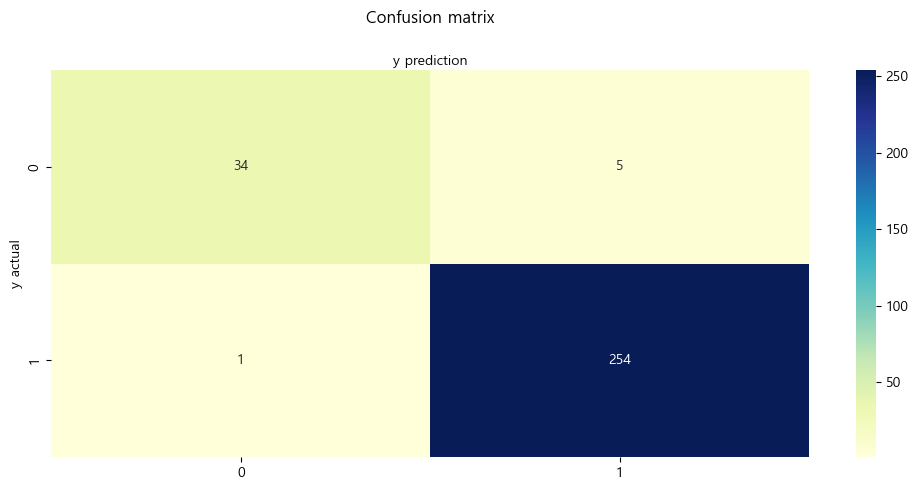

              precision    recall  f1-score   support

         0.0       0.97      0.87      0.92        39
         1.0       0.98      1.00      0.99       255

    accuracy                           0.98       294
   macro avg       0.98      0.93      0.95       294
weighted avg       0.98      0.98      0.98       294



In [275]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
fig, ax = plt.subplots(figsize=(10,5))
cm = metrics.confusion_matrix(y_test,gb_predictions)
sns.heatmap(metrics.confusion_matrix(y_test,gb_predictions),annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('y prediction')
plt.ylabel('y actual')
plt.show()

print(classification_report(y_test, gb_predictions))

In [276]:
#### XGBoost classifier

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

best_acc = 0.0
best_clf = None
best_model_name = ""
best_params = {}
scoring_list = ['accuracy','recall','f1']
scoring = scoring_list[0]

import numpy as np
params = {
    'classifier__n_estimators': [200,300,400,500],
    'classifier__learning_rate': [1e-2,1e-1,],
    'classifier__max_depth': [1,2,3,4]
}

xgb_clf = XGBClassifier()
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=params, cv=5, scoring=scoring , verbose=1)
grid_search.fit(smote_train, smote_target)

xgb_predictions = grid_search.predict(X_test)
print('accuracy',metrics.accuracy_score(y_test, xgb_predictions))

import pickle
with open('xgb.pkl','wb') as f:
    pickle.dump(xgb_clf,f)

# # 가장 좋은 성능의 모델과 파라미터 저장
# if grid_search.best_score_ > best_acc:
#     best_acc = grid_search.best_score_
#     best_clf = grid_search.best_estimator_
#     best_params = grid_search.best_params_

Fitting 5 folds for each of 32 candidates, totalling 160 fits
accuracy 0.9761904761904762


In [ ]:
0.9761904761904762 # 파생변수 HighPerformerQuit

0.9761904761904762

In [278]:
from sklearn.metrics import f1_score

best_t = 0.0
best_f1 = 0.0

for t in range(1000):
    t = t / 1000
    y_pred = (y_proba >= t).astype(int)
    f1 = f1_score(y_test, y_pred)
    
    if f1 > best_f1:
        best_t = t
        best_f1 = f1

print(f"💥 Best Threshold (F1 기준) = {best_t:.3f}")
print(f"📈 Best F1-score = {best_f1:.4f}")


NameError: name 'y_proba' is not defined

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve
)

# ✅ Confusion Matrix
y_prob = best_clf.predict_proba(X_test)[:, 1]

y_pred_custom = (y_prob >= best_t).astype(int)

cm = confusion_matrix(y_test, y_pred_custom)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (Threshold={best_t:.3f})")
plt.tight_layout()
plt.show()

ValueError: feature_names mismatch: ['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'HighPerformerQuit', 'PromotionDelay', 'OverallSatisfaction', 'Is_Manager'] ['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsSinceLastPromotion']
expected YearsAtCompany, MonthlyIncome, YearsInCurrentRole, Is_Manager, YearsWithCurrManager, PromotionDelay, HighPerformerQuit, OverallSatisfaction in input data